Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import joblib


# **Functions**

**Define Functions to plot data values and distribution**

In [ ]:
def plot_data(dataframe, x_column, columns_to_plot, fig_size=(16, 8), method='plotly', date_range=None):
    if date_range:
        start_date, end_date = date_range
        selected_df = dataframe[(dataframe[x_column] >= start_date) & (dataframe[x_column] <= end_date)]
    else:
        selected_df = dataframe

    min_val = selected_df[x_column].min()
    max_val = selected_df[x_column].max()
    title = f'Data Plot ({min_val} to {max_val})'

    if method == 'plotly':
        fig = px.line(selected_df, x=x_column, y=columns_to_plot, title=title)
        fig.show()
    elif method == 'seaborn':
        plt.figure(figsize=fig_size)
        for col in columns_to_plot:
            sns.lineplot(data=selected_df, x=x_column, y=col, label=col)
        plt.title(title)
        plt.legend()
        plt.show()

    elif method == 'matplotlib':
        plt.figure(figsize=fig_size)
        for col in columns_to_plot:
            plt.plot(selected_df[x_column], selected_df[col], label=col)
        plt.xlabel(x_column)
        plt.ylabel('Value')
        plt.title(title)
        plt.legend()
        plt.show()
    else:
        print("Invalid method. Supported methods are 'plotly', 'seaborn', and 'matplotlib'.")
'''
# Example usage for plotting specific date range:
columns_to_plot = ['Outdoor_Temp_°C', 'Outdoor_Humidity_%', 'Outdoor_Irradiance_W/m2', 'Indoor_Temp_°C', 'Indoor_Humidity_%', 'Power_W']
plot_data(merged_df, 'DateTime', columns_to_plot, fig_size=(10.0, 8.0), method='plotly', date_range=('2024-02-13', '2024-02-15'))

# Example usage for plotting entire dataset:
 plot_data(merged_df, 'DateTime', columns_to_plot, fig_size=(10.0, 8.0), method='plotly')
'''



def plot_distribution(df, columns_to_plot, plot_library='plotly'):
    """
    Plot distribution of specified columns in the DataFrame using the specified plotting library.

    Parameters:
        df (DataFrame): The DataFrame for which distribution is to be plotted.
        columns_to_plot (list): List of column names for which distribution is to be plotted.
        plot_library (str): Name of the plotting library to be used ('seaborn', 'matplotlib', or 'plotly').
    """
    for column in columns_to_plot:
        if plot_library == 'seaborn':
            sns.histplot(df[column], kde=True)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        elif plot_library == 'matplotlib':
            plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        elif plot_library == 'plotly':
            fig = px.histogram(df, x=column, title=f'Distribution of {column}')
            fig.show()
        else:
            print(f"Plotting library '{plot_library}' is not supported.")

# Using scikitlearn


def calculate_metrics(y_true, y_pred):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate R-squared
    r_squared = r2_score(y_true, y_pred)

    # Calculate NMBE
    nmbe = (np.sum(y_pred - y_true) / (len(y_true) * np.mean(y_true))) * 100

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    return mae, rmse, r_squared, nmbe




# Using tensorflow

def calculate_metrics_tf(y_true, y_pred):
    y_true_tf = tf.convert_to_tensor(y_true, dtype=tf.float64)
    y_pred_tf = tf.convert_to_tensor(y_pred, dtype=tf.float64)

    # Calculate RMSE using TensorFlow
    mse_tf = tf.reduce_mean(tf.square(y_true_tf - y_pred_tf))
    rmse_tf = tf.sqrt(mse_tf)

    # Calculate R-squared using TensorFlow
    r_squared_tf = 1 - tf.reduce_sum(tf.square(y_true_tf - y_pred_tf)) / tf.reduce_sum(tf.square(y_true_tf - tf.reduce_mean(y_true_tf)))

    # Calculate NMBE using TensorFlow
    nmbe_tf = ((tf.reduce_sum(tf.cast(y_pred_tf - y_true_tf, tf.float64)) / (tf.cast(tf.size(y_true_tf), tf.float64) * tf.reduce_mean(y_true_tf))) * 100)

    # Calculate MAE using TensorFlow
    mae_tf = tf.reduce_mean(tf.abs(y_pred_tf - y_true_tf))

    # Evaluate tensors
    rmse_result, r_squared_result, nmbe_result, mae_result = rmse_tf.numpy(), r_squared_tf.numpy(), nmbe_tf.numpy(), mae_tf.numpy()

    return mae_result, rmse_result, r_squared_result, nmbe_result

def print_metrices():
  print()

  print("Final Validation MAE:", mae_validation, 'from tf:', mae_tf_validation)
  print("Final Validation RMSE:", rmse_validation, 'from tf:', rmse_tf_validation)
  print("Final Validation R-Squared:", r_squared_validation, 'from tf:', r_squared_tf_validation)
  print("Final Validation NMBE:", nmbe_validation, 'from tf:', nmbe_tf_validation)
  print()

  print("Final Test  MAE:", mae_test, 'from tf:', mae_tf_test)
  print("Final Test  RMSE:", rmse_test, 'from tf:', rmse_tf_test)
  print("Final Test  R-Squared:", r_squared_test, 'from tf:', r_squared_tf_test)
  print("Final Test  NMBE:", nmbe_test, 'from tf:', nmbe_tf_test)
  print()


# **Load Data**

In [ ]:
# Load the dataset
dataFrame = pd.read_csv('/content/AmilaSir_office_FinalCombined_30T_Simulation_Augmented_2023-01-01_to_2023-12-31.csv')
dataFrame.head()

,DateTime,Day_of_year,Time_of_day,Time,Day_of_year_normalized,Time_of_day_normalized,Outdoor_Temp_°C,Outdoor_Humidity_%,Outdoor_SolarRadiation_W/m2,Indoor_Temp_°C,Indoor_Humidity_%,FloorNumber,Volume_of_Room_m3,AC_type,Rated_wattage,BTU,Energy_Efficiency_Ratio,Operating_state,Power_W
0,2023-01-01 00:00:00,1,0,0,0.0,0.000,23.189,86.667,0.0,24.0,70.444,0,40.74,2,2065,24000,3.72,2,317.268
1,2023-01-01 00:30:00,1,1,30,0.0,0.021,23.367,84.000,0.0,24.0,71.257,0,40.74,2,2065,24000,3.72,2,311.543
2,2023-01-01 01:00:00,1,2,60,0.0,0.042,23.267,84.000,0.0,24.0,71.812,0,40.74,2,2065,24000,3.72,2,298.043
3,2023-01-01 01:30:00,1,3,90,0.0,0.062,22.567,90.000,0.0,24.0,71.945,0,40.74,2,2065,24000,3.72,2,277.687
4,2023-01-01 02:00:00,1,4,120,0.0,0.083,21.933,95.000,0.0,24.0,71.551,0,40.74,2,2065,24000,3.72,2,254.744


In [ ]:
plot_data(dataFrame, 'DateTime', ["Power_W"], fig_size=(10.0, 8.0), method='plotly',date_range=('2024-02-13', '2024-02-16'))

In [ ]:
print("\n".join(dataFrame.columns))
dataFrame.shape

DateTime
Day_of_year
Time_of_day
Time
Day_of_year_normalized
Time_of_day_normalized
Outdoor_Temp_°C
Outdoor_Humidity_%
Outdoor_SolarRadiation_W/m2
WindSpeed
Indoor_Temp_°C
Indoor_Humidity_%
FloorNumber
Volume_of_Room_m3
AC_type
Rated_wattage
BTU
Operating_state
Power_W


(236, 19)

# **For loop for optimize**

In [ ]:
def plot_history(history,method ='plotly'):
  if method=='plotly':
    # Extracting training loss and validation loss from history
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Creating a DataFrame for plotting
    history_df = pd.DataFrame({'Epoch': range(1, len(train_loss) + 1),
                              'Training Loss': train_loss,
                              'Validation Loss': validation_loss})




    # Plotting the learning curve using Plotly Express
    fig = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                  labels={'value': 'Loss', 'variable': 'Loss Type'},
                  title='Learning Curve: Training and Validation Loss Over Epochs')
    fig.show()
  else:
    sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label="train loss")
    sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label="validation loss")
    plt.xlabel("epochs")
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



**Data Sets with mixing**

In [ ]:

# Assuming dataFrame is your DataFrame containing the dataset

# Columns to keep constant
constant_columns = ["Operating_state"]

# Columns to scale
columns_to_scale = ["Time_of_day", 'Day_of_year', 'Outdoor_Temp_°C', 'Outdoor_Humidity_%', 'Outdoor_SolarRadiation_W/m2',
                    'Indoor_Temp_°C', 'Indoor_Humidity_%', "Volume_of_Room_m3", "Rated_wattage","Energy_Efficiency_Ratio", "BTU"]  # 'WindSpeed' ,"Time",

# Separate constant columns
constant_df = dataFrame[constant_columns]

# Standardize the remaining columns
scaler = StandardScaler()
scaler.fit(dataFrame[columns_to_scale])
scaled_data = scaler.transform(dataFrame[columns_to_scale])
# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenate constant columns with scaled data
X = pd.concat([constant_df, scaled_df], axis=1)


# Extract the target variable y
Y = dataFrame['Power_W']

# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Ensure the lengths of each set
train_length = len(X_train)
dev_length = len(X_dev)
test_length = len(X_test)

# Check the lengths of each set
print("Train set length:", train_length)
print("Dev set length:", dev_length)
print("Test set length:", test_length)


Train set length: 39420
Dev set length: 6570
Test set length: 6570


##Model 1

In [ ]:
def train_model(X_train,Y_train,num_nodes_L1,num_nodes_L2,num_nodes_L3,learning_rate,batch_size,epochs):
  Model= tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes_L1, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(num_nodes_L2, activation='relu'),
    tf.keras.layers.Dense(num_nodes_L3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])

  optimizer = Adam(learning_rate = learning_rate)

  # Compile the model with mean absolute error as the loss function and MAE as a metric

  Model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])
  history = Model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_dev, Y_dev),verbose=0)
  return Model,history


num_nodes_L1:300, num_nodes_L2:200, num_nodes_L3:25, learning_rate:0.01, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 17.4980 - mae: 17.4980


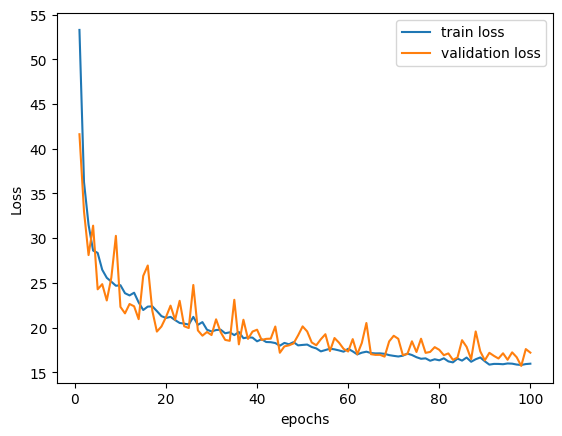

206/206 [==============================] - 0s 1ms/step

Final Validation MAE: 17.193981202518724 from tf: 17.19398120251872
Final Validation RMSE: 49.487407257623644 from tf: 49.48740725762365
Final Validation R-Squared: 0.9857008976968633 from tf: 0.9857008976968633
Final Validation NMBE: 0.9712222201976981 from tf: 0.9712222201976981

Final Test  MAE: 17.49801220001891 from tf: 17.49801220001891
Final Test  RMSE: 50.59102950939577 from tf: 50.591029509395774
Final Test  R-Squared: 0.9858808869846235 from tf: 0.9858808869846235
Final Test  NMBE: 1.020857039727093 from tf: 1.020857039727093



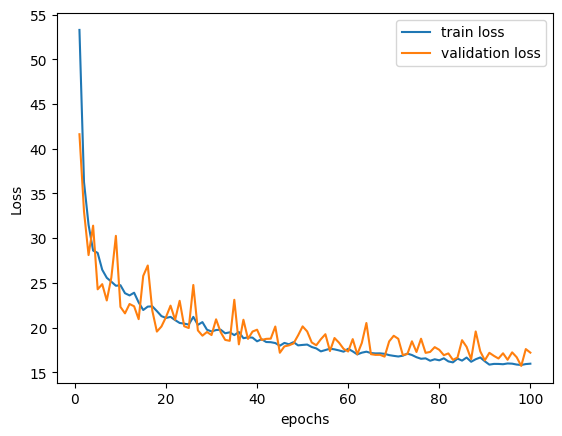

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 17.193981202518724 from tf: 17.19398120251872
Final Validation RMSE: 49.487407257623644 from tf: 49.48740725762365
Final Validation R-Squared: 0.9857008976968633 from tf: 0.9857008976968633
Final Validation NMBE: 0.9712222201976981 from tf: 0.9712222201976981

Final Test  MAE: 17.49801220001891 from tf: 17.49801220001891
Final Test  RMSE: 50.59102950939577 from tf: 50.591029509395774
Final Test  R-Squared: 0.9858808869846235 from tf: 0.9858808869846235
Final Test  NMBE: 1.020857039727093 from tf: 1.020857039727093

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:200, num_nodes_L3:25, learning_rate:0.1, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 20.6473 - mae: 20.6473
*****************************************************************************

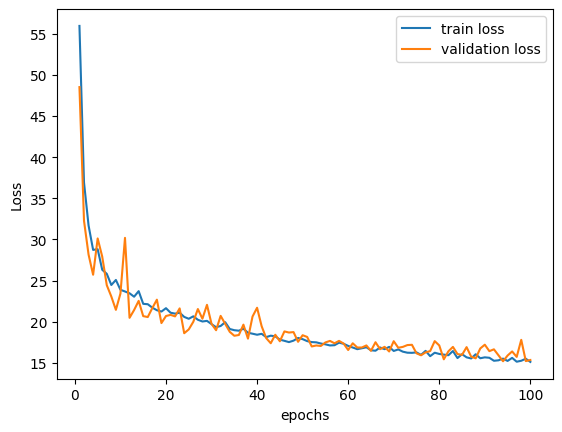

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.330724665201547 from tf: 15.330724665201547
Final Validation RMSE: 42.86504720458909 from tf: 42.86504720458909
Final Validation R-Squared: 0.989271821663744 from tf: 0.989271821663744
Final Validation NMBE: 0.22919867733312416 from tf: 0.22919867733312427

Final Test  MAE: 16.22476293537564 from tf: 16.22476293537564
Final Test  RMSE: 45.10596287270967 from tf: 45.10596287270966
Final Test  R-Squared: 0.9887765003787964 from tf: 0.9887765003787964
Final Test  NMBE: 0.41214442288712216 from tf: 0.41214442288712205



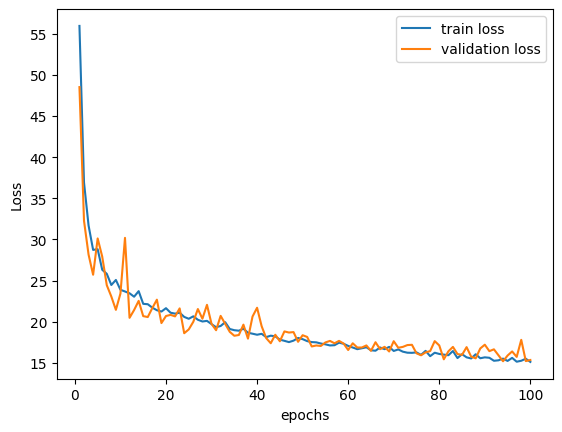

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.330724665201547 from tf: 15.330724665201547
Final Validation RMSE: 42.86504720458909 from tf: 42.86504720458909
Final Validation R-Squared: 0.989271821663744 from tf: 0.989271821663744
Final Validation NMBE: 0.22919867733312416 from tf: 0.22919867733312427

Final Test  MAE: 16.22476293537564 from tf: 16.22476293537564
Final Test  RMSE: 45.10596287270967 from tf: 45.10596287270966
Final Test  R-Squared: 0.9887765003787964 from tf: 0.9887765003787964
Final Test  NMBE: 0.41214442288712216 from tf: 0.41214442288712205

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:200, num_nodes_L3:30, learning_rate:0.1, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 21.8109 - mae: 21.8109
**************************************************************************

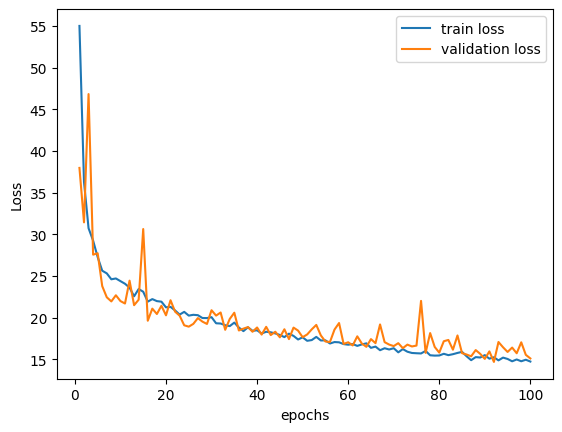

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.119856553226047 from tf: 15.119856553226043
Final Validation RMSE: 42.980845172299226 from tf: 42.98084517229922
Final Validation R-Squared: 0.9892137800032423 from tf: 0.9892137800032423
Final Validation NMBE: -0.1394106844745413 from tf: -0.1394106844745413

Final Test  MAE: 15.99120528480539 from tf: 15.991205284805392
Final Test  RMSE: 45.93472713700446 from tf: 45.93472713700445
Final Test  R-Squared: 0.9883602765527748 from tf: 0.9883602765527748
Final Test  NMBE: -0.15270485068717665 from tf: -0.15270485068717674



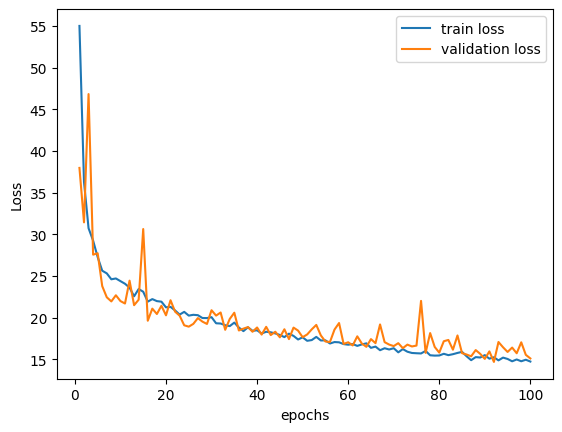

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.119856553226047 from tf: 15.119856553226043
Final Validation RMSE: 42.980845172299226 from tf: 42.98084517229922
Final Validation R-Squared: 0.9892137800032423 from tf: 0.9892137800032423
Final Validation NMBE: -0.1394106844745413 from tf: -0.1394106844745413

Final Test  MAE: 15.99120528480539 from tf: 15.991205284805392
Final Test  RMSE: 45.93472713700446 from tf: 45.93472713700445
Final Test  R-Squared: 0.9883602765527748 from tf: 0.9883602765527748
Final Test  NMBE: -0.15270485068717665 from tf: -0.15270485068717674

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:250, num_nodes_L3:25, learning_rate:0.1, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 22.7298 - mae: 22.7298
********************************************************************

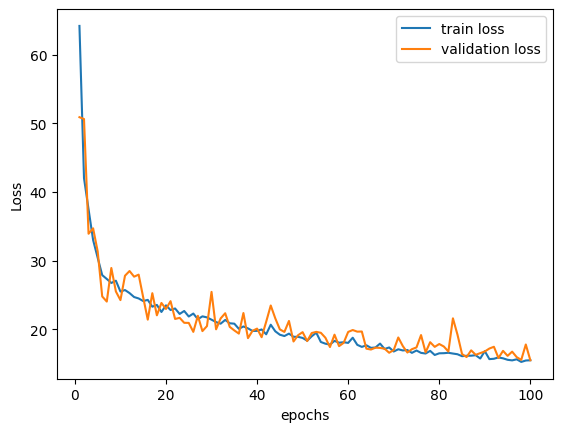

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.461890454250877 from tf: 15.46189045425088
Final Validation RMSE: 43.992680568275354 from tf: 43.99268056827536
Final Validation R-Squared: 0.988699953720261 from tf: 0.988699953720261
Final Validation NMBE: -0.0478125321252607 from tf: -0.047812532125260716

Final Test  MAE: 15.861479463571046 from tf: 15.861479463571047
Final Test  RMSE: 46.76770696100798 from tf: 46.76770696100799
Final Test  R-Squared: 0.9879342997005929 from tf: 0.9879342997005929
Final Test  NMBE: 0.19253538047620875 from tf: 0.19253538047620875

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:250, num_nodes_L3:30, learning_rate:0.1, batch_size:200
206/206 [==============================] - 0s 2ms/step - loss: 22.6190 - mae: 22.6190
**********************************************************************

In [ ]:
'''
1st Attempt

Best Model Details on validation for model 1: {'num_nodes_L1': 300, 'num_nodes_L2': 250, 'num_nodes_L3': 25, 'learning_rate': 0.01, 'batch_size': 128,
'Validation_MAE': 15.119856553226047, 'Test_MAE:': 15.99120528480539, 'Validation R Squared': 0.9892137800032423, 'Test R Squared': 0.9883602765527748}

Best Model Details on test for model 1: {'num_nodes_L1': 300, 'num_nodes_L2': 250, 'num_nodes_L3': 30, 'learning_rate': 0.01, 'batch_size': 200,
'Validation_MAE': 15.461890454250877, 'Test_MAE:': 15.861479463571046, 'Validation R Squared': 0.988699953720261, 'Test R Squared': 0.9879342997005929}

2nd Attempt

Best Model Details on validation for model 1: {'num_nodes_L1': 250, 'num_nodes_L2': 240, 'num_nodes_L3': 35, 'learning_rate': 0.01, 'batch_size': 128,
'Validation_MAE': 14.308763377226391, 'Test_MAE:': 14.551019572300087, 'Validation R Squared': 0.9902853173900721, 'Test R Squared': 0.9896650979351089}

Best Model Details on test for model 1: {'num_nodes_L1': 250, 'num_nodes_L2': 240, 'num_nodes_L3': 35, 'learning_rate': 0.01, 'batch_size': 128,
'Validation_MAE': 14.308763377226391, 'Test_MAE:': 14.551019572300087, 'Validation R Squared': 0.9902853173900721, 'Test R Squared': 0.9896650979351089}

'''


epochs = 100

least_val_loss = float('inf')
least_val_loss_model = None
best_model_details_val = {}

least_test_loss = float('inf')
least_test_loss_model = None
best_model_details_test = {}

for batch_size in [128, 200]:           #150(tried), 200, 256
    for num_nodes_L1 in range(300, 351, 50):
        for num_nodes_L2 in [200,250]:
            for num_nodes_L3 in range (25,31, 5):
                for learning_rate in [0.01, 0.1]:
                    print(f"num_nodes_L1:{num_nodes_L1}, num_nodes_L2:{num_nodes_L2}, num_nodes_L3:{num_nodes_L3}, learning_rate:{learning_rate}, batch_size:{batch_size}")
                    model, history = train_model(X_train, Y_train, num_nodes_L1, num_nodes_L2, num_nodes_L3, learning_rate, batch_size, epochs)

                    val_loss = model.evaluate(X_dev, Y_dev)[0]  # Extracting the loss value from the list
                    test_loss = model.evaluate(X_test, Y_test)[0]  # Extracting the loss value from the list

                    if val_loss < least_val_loss:
                        least_val_loss = val_loss
                        least_val_loss_model = model
                        plot_history(history, method='seaborn')

                        y_dev_pred_S = model.predict(X_dev).flatten()
                        mae_validation, rmse_validation, r_squared_validation, nmbe_validation = calculate_metrics(Y_dev, y_dev_pred_S)
                        mae_tf_validation, rmse_tf_validation, r_squared_tf_validation, nmbe_tf_validation = calculate_metrics_tf(Y_dev, y_dev_pred_S)

                        y_test_pred_S = model.predict(X_test).flatten()
                        mae_test, rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred_S)
                        mae_tf_test, rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred_S)

                        best_model_details_val = {
                            "num_nodes_L1": num_nodes_L1,
                            "num_nodes_L2": num_nodes_L2,
                            "num_nodes_L3": num_nodes_L3,
                            "learning_rate": learning_rate,
                            "batch_size": batch_size,
                            "Validation_MAE": mae_validation,
                            "Test_MAE:": mae_test,
                            "Validation R Squared": r_squared_validation,
                            "Test R Squared": r_squared_test
                        }

                        print_metrices()


                    if test_loss < least_test_loss:
                        least_test_loss = test_loss
                        least_test_loss_model = model
                        plot_history(history, method='seaborn')

                        y_dev_pred_S = model.predict(X_dev).flatten()
                        mae_validation, rmse_validation, r_squared_validation, nmbe_validation = calculate_metrics(Y_dev, y_dev_pred_S)
                        mae_tf_validation, rmse_tf_validation, r_squared_tf_validation, nmbe_tf_validation = calculate_metrics_tf(Y_dev, y_dev_pred_S)

                        y_test_pred_S = model.predict(X_test).flatten()
                        mae_test, rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred_S)
                        mae_tf_test, rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred_S)

                        best_model_details_test = {
                            "num_nodes_L1": num_nodes_L1,
                            "num_nodes_L2": num_nodes_L2,
                            "num_nodes_L3": num_nodes_L3,
                            "learning_rate": learning_rate,
                            "batch_size": batch_size,
                            "Validation_MAE": mae_validation,
                            "Test_MAE:": mae_test,
                            "Validation R Squared": r_squared_validation,
                            "Test R Squared": r_squared_test
                        }
                        print_metrices()

                    print('*' * 150)


In [ ]:
print("Best Model Details on validation for model 1:", best_model_details_val)
print("Best Model Details on test for model 1:", best_model_details_test)

Best Model Details on validation for model 1: {'num_nodes_L1': 300, 'num_nodes_L2': 250, 'num_nodes_L3': 25, 'learning_rate': 0.01, 'batch_size': 128, 'Validation_MAE': 15.119856553226047, 'Test_MAE:': 15.99120528480539, 'Validation R Squared': 0.9892137800032423, 'Test R Squared': 0.9883602765527748}
Best Model Details on test for model 1: {'num_nodes_L1': 300, 'num_nodes_L2': 250, 'num_nodes_L3': 30, 'learning_rate': 0.01, 'batch_size': 200, 'Validation_MAE': 15.461890454250877, 'Test_MAE:': 15.861479463571046, 'Validation R Squared': 0.988699953720261, 'Test R Squared': 0.9879342997005929}


In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')
least_test_loss_model.save('least_test_loss_model1.h5')
least_val_loss_model.save('least_val_loss_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Model 2

In [ ]:
def train_model2(X_train,Y_train,num_nodes_L1,num_nodes_L2,num_nodes_L3,num_nodes_L4,learning_rate,batch_size,epochs):
  Model= tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes_L1, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(num_nodes_L2, activation='relu'),
    tf.keras.layers.Dense(num_nodes_L3, activation='relu'),
    tf.keras.layers.Dense(num_nodes_L4, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
  ])

  optimizer = Adam(learning_rate = learning_rate)

  # Compile the model with mean absolute error as the loss function and MAE as a metric

  Model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])
  history = Model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_dev, Y_dev),verbose=0)
  return Model,history


num_nodes_L1:250, num_nodes_L2:250, num_nodes_L3:120, num_nodes_L4:5, learning_rate:0.001, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 18.7928 - mae: 18.7928


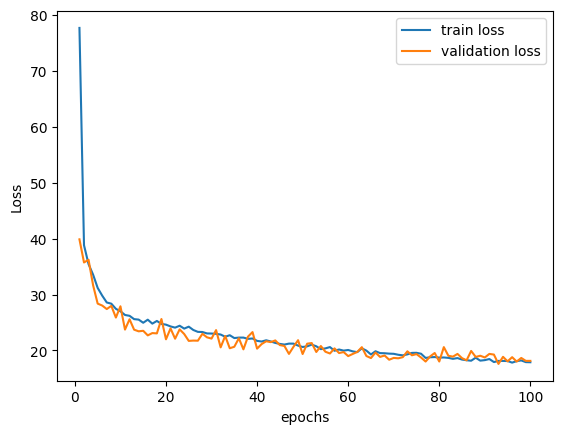

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 18.140623972041436 from tf: 18.140623972041436
Final Validation RMSE: 52.75815007713829 from tf: 52.75815007713829
Final Validation R-Squared: 0.9837483115003164 from tf: 0.9837483115003164
Final Validation NMBE: -1.8759424287191726 from tf: -1.8759424287191726

Final Test  MAE: 18.79281108976913 from tf: 18.79281108976913
Final Test  RMSE: 54.5833285194072 from tf: 54.5833285194072
Final Test  R-Squared: 0.9835645949648504 from tf: 0.9835645949648504
Final Test  NMBE: -1.637789752963642 from tf: -1.637789752963642



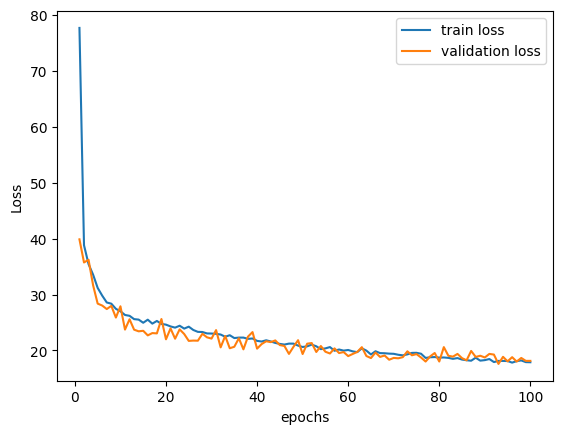

206/206 [==============================] - 1s 3ms/step

Final Validation MAE: 18.140623972041436 from tf: 18.140623972041436
Final Validation RMSE: 52.75815007713829 from tf: 52.75815007713829
Final Validation R-Squared: 0.9837483115003164 from tf: 0.9837483115003164
Final Validation NMBE: -1.8759424287191726 from tf: -1.8759424287191726

Final Test  MAE: 18.79281108976913 from tf: 18.79281108976913
Final Test  RMSE: 54.5833285194072 from tf: 54.5833285194072
Final Test  R-Squared: 0.9835645949648504 from tf: 0.9835645949648504
Final Test  NMBE: -1.637789752963642 from tf: -1.637789752963642

******************************************************************************************************************************************************
num_nodes_L1:250, num_nodes_L2:250, num_nodes_L3:120, num_nodes_L4:5, learning_rate:0.01, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 15.0129 - mae: 15.0129


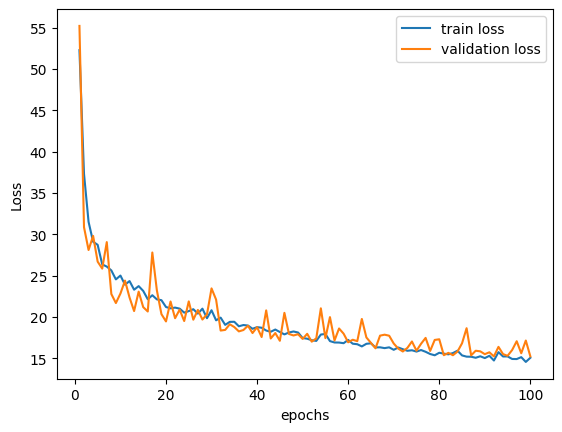

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.253403374507293 from tf: 15.253403374507295
Final Validation RMSE: 44.28740742937751 from tf: 44.28740742937751
Final Validation R-Squared: 0.9885480383040597 from tf: 0.9885480383040597
Final Validation NMBE: 1.5825945070651222 from tf: 1.5825945070651222

Final Test  MAE: 15.012896351017687 from tf: 15.012896351017687
Final Test  RMSE: 43.96927481457161 from tf: 43.9692748145716
Final Test  R-Squared: 0.9893350460204204 from tf: 0.9893350460204204
Final Test  NMBE: 1.587103496958551 from tf: 1.587103496958551



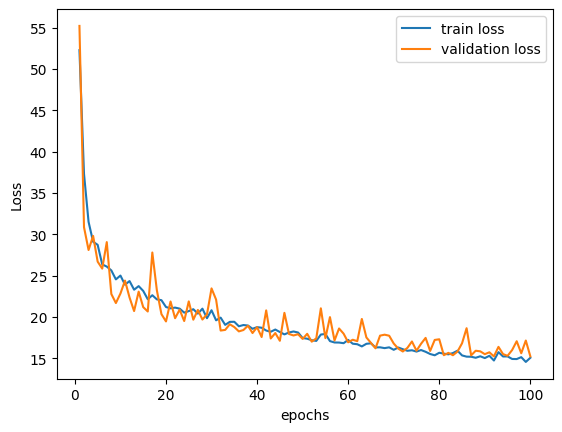

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.253403374507293 from tf: 15.253403374507295
Final Validation RMSE: 44.28740742937751 from tf: 44.28740742937751
Final Validation R-Squared: 0.9885480383040597 from tf: 0.9885480383040597
Final Validation NMBE: 1.5825945070651222 from tf: 1.5825945070651222

Final Test  MAE: 15.012896351017687 from tf: 15.012896351017687
Final Test  RMSE: 43.96927481457161 from tf: 43.9692748145716
Final Test  R-Squared: 0.9893350460204204 from tf: 0.9893350460204204
Final Test  NMBE: 1.587103496958551 from tf: 1.587103496958551

******************************************************************************************************************************************************
num_nodes_L1:250, num_nodes_L2:250, num_nodes_L3:120, num_nodes_L4:10, learning_rate:0.001, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 20.6555 - mae: 20.6555
*********************************************************

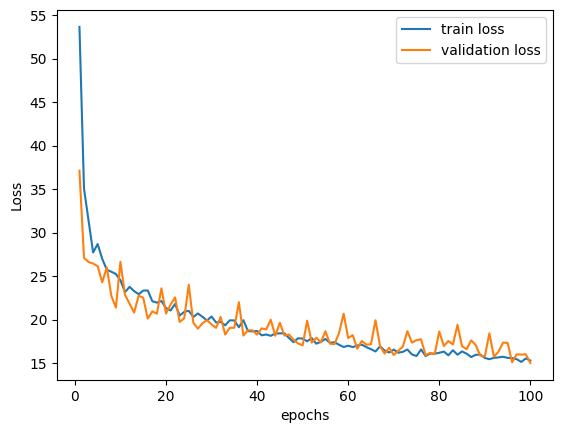

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.017444104883321 from tf: 15.01744410488332
Final Validation RMSE: 43.71116353293118 from tf: 43.71116353293114
Final Validation R-Squared: 0.9888441130256374 from tf: 0.9888441130256374
Final Validation NMBE: 0.9409881477392338 from tf: 0.9409881477392341

Final Test  MAE: 15.725522344182616 from tf: 15.725522344182616
Final Test  RMSE: 46.20199358968775 from tf: 46.20199358968771
Final Test  R-Squared: 0.9882244334537842 from tf: 0.9882244334537842
Final Test  NMBE: 1.2863710656306733 from tf: 1.2863710656306733

******************************************************************************************************************************************************
num_nodes_L1:250, num_nodes_L2:350, num_nodes_L3:120, num_nodes_L4:15, learning_rate:0.001, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 17.3323 - mae: 17.3323
*******************************************************

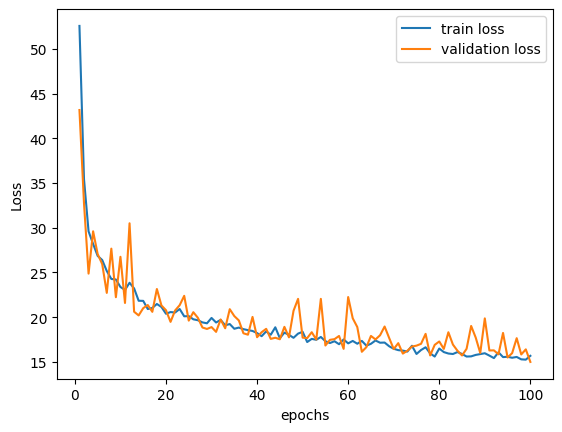

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 15.006170150490522 from tf: 15.006170150490522
Final Validation RMSE: 43.981264809666435 from tf: 43.98126480966645
Final Validation R-Squared: 0.988705817507685 from tf: 0.988705817507685
Final Validation NMBE: 0.3067265261742502 from tf: 0.3067265261742502

Final Test  MAE: 15.70935496905994 from tf: 15.709354969059937
Final Test  RMSE: 47.11077461516008 from tf: 47.11077461516008
Final Test  R-Squared: 0.9877566329295329 from tf: 0.9877566329295329
Final Test  NMBE: 0.5748464601185364 from tf: 0.5748464601185364

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:250, num_nodes_L3:120, num_nodes_L4:15, learning_rate:0.001, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 19.1809 - mae: 19.1809
********************************************************

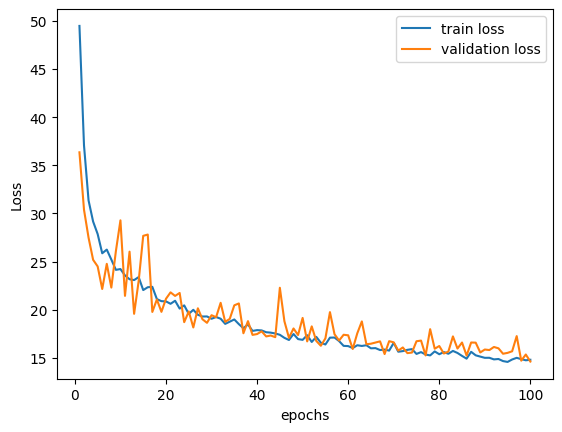

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 14.605128721214244 from tf: 14.605128721214244
Final Validation RMSE: 42.801026008219694 from tf: 42.80102600821973
Final Validation R-Squared: 0.9893038439265333 from tf: 0.9893038439265333
Final Validation NMBE: -0.2673232166502065 from tf: -0.2673232166502065

Final Test  MAE: 15.180580642969641 from tf: 15.180580642969641
Final Test  RMSE: 45.366414595468115 from tf: 45.366414595468164
Final Test  R-Squared: 0.9886465122723155 from tf: 0.9886465122723155
Final Test  NMBE: -0.09288620171529953 from tf: -0.09288620171529952

******************************************************************************************************************************************************
num_nodes_L1:300, num_nodes_L2:350, num_nodes_L3:150, num_nodes_L4:10, learning_rate:0.001, batch_size:128
206/206 [==============================] - 1s 3ms/step - loss: 17.5030 - mae: 17.5030
*********************************************

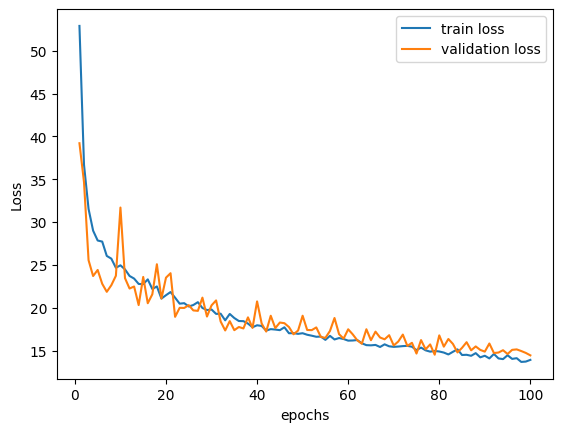

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 14.442074963868123 from tf: 14.442074963868125
Final Validation RMSE: 42.692128136744834 from tf: 42.692128136744834
Final Validation R-Squared: 0.9893582027568045 from tf: 0.9893582027568045
Final Validation NMBE: -0.364689101762123 from tf: -0.3646891017621228

Final Test  MAE: 14.863730254798389 from tf: 14.863730254798389
Final Test  RMSE: 45.06879823686464 from tf: 45.06879823686463
Final Test  R-Squared: 0.9887949877542934 from tf: 0.9887949877542934
Final Test  NMBE: -0.22915789044148732 from tf: -0.22915789044148732



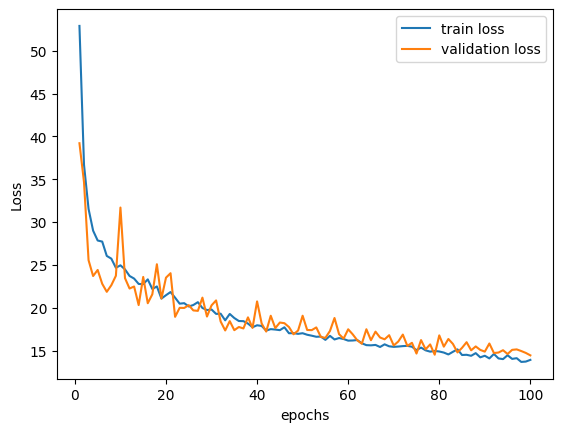

206/206 [==============================] - 0s 2ms/step

Final Validation MAE: 14.442074963868123 from tf: 14.442074963868125
Final Validation RMSE: 42.692128136744834 from tf: 42.692128136744834
Final Validation R-Squared: 0.9893582027568045 from tf: 0.9893582027568045
Final Validation NMBE: -0.364689101762123 from tf: -0.3646891017621228

Final Test  MAE: 14.863730254798389 from tf: 14.863730254798389
Final Test  RMSE: 45.06879823686464 from tf: 45.06879823686463
Final Test  R-Squared: 0.9887949877542934 from tf: 0.9887949877542934
Final Test  NMBE: -0.22915789044148732 from tf: -0.22915789044148732

******************************************************************************************************************************************************
num_nodes_L1:350, num_nodes_L2:250, num_nodes_L3:120, num_nodes_L4:10, learning_rate:0.001, batch_size:128
206/206 [==============================] - 0s 2ms/step - loss: 17.4759 - mae: 17.4759
***********************************************

In [ ]:
''' 1st attempt

Best Model Details on validation for model 2: {'num_nodes_L1': 300, 'num_nodes_L2': 290, 'num_nodes_L3': 140, 'num_nodes_L4': 35, 'learning_rate': 0.001, 'batch_size': 128,
'Validation_MAE': 14.937228843905897, 'Test_MAE:': 15.119325771226533, 'Validation R Squared': 0.9889790819090114, 'Test R Squared': 0.9893753111238655}

Best Model Details on test for model 2: {'num_nodes_L1': 300, 'num_nodes_L2': 290, 'num_nodes_L3': 140, 'num_nodes_L4': 35, 'learning_rate': 0.001, 'batch_size': 128,
'Validation_MAE': 14.937228843905897, 'Test_MAE:': 15.119325771226533, 'Validation R Squared': 0.9889790819090114, 'Test R Squared': 0.9893753111238655}



2nd Attempt

Best Model Details on validation: {'num_nodes_L1': 350, 'num_nodes_L2': 250, 'num_nodes_L3': 120, 'num_nodes_L4': 5, 'learning_rate': 0.01,'batch_size': 128,
'Validation_MAE': 14.441687123325893, 'Test_MAE:': 14.8657235514323, 'Validation R Squared': 0.9895316427957609, 'Test R Squared': 0.9887439024812266}




'''
epochs = 100

least_val_loss = float('inf')
least_val_loss_model2 = None
best_model_details_val2 = {}

least_test_loss = float('inf')
least_test_loss_model2 = None
best_model_details_test2 = {}

for batch_size in [128, 200]:           #150(tried), 200, 256
  for num_nodes_L1 in range(250, 351, 50):
      for num_nodes_L2 in range(250,351, 50):
          for num_nodes_L3 in range(120, 171, 30):
              for num_nodes_L4 in range(5, 16, 5):
                  for learning_rate in [0.001,0.01]:

                        print(f"num_nodes_L1:{num_nodes_L1}, num_nodes_L2:{num_nodes_L2}, num_nodes_L3:{num_nodes_L3}, num_nodes_L4:{num_nodes_L4}, learning_rate:{learning_rate}, batch_size:{batch_size}")
                        model, history = train_model2(X_train, Y_train, num_nodes_L1, num_nodes_L2, num_nodes_L3, num_nodes_L4, learning_rate, batch_size, epochs)


                        val_loss = model.evaluate(X_dev, Y_dev)[0]  # Extracting the loss value from the list
                        test_loss = model.evaluate(X_test, Y_test)[0]  # Extracting the loss value from the list

                        if val_loss < least_val_loss:
                            least_val_loss = val_loss
                            least_val_loss_model2 = model
                            plot_history(history, method='seaborn')

                            y_dev_pred_S = model.predict(X_dev).flatten()
                            mae_validation, rmse_validation, r_squared_validation, nmbe_validation = calculate_metrics(Y_dev, y_dev_pred_S)
                            mae_tf_validation, rmse_tf_validation, r_squared_tf_validation, nmbe_tf_validation = calculate_metrics_tf(Y_dev, y_dev_pred_S)

                            y_test_pred_S = model.predict(X_test).flatten()
                            mae_test, rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred_S)
                            mae_tf_test, rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred_S)

                            best_model_details_val2 = {
                                "num_nodes_L1": num_nodes_L1,
                                "num_nodes_L2": num_nodes_L2,
                                "num_nodes_L3": num_nodes_L3,
                                "num_nodes_L4": num_nodes_L4,
                                "learning_rate": learning_rate,
                                "batch_size": batch_size,
                                "Validation_MAE": mae_validation,
                                "Test_MAE:": mae_test,
                                "Validation R Squared": r_squared_validation,
                                "Test R Squared": r_squared_test
                            }

                            print_metrices()


                        if test_loss < least_test_loss:
                            least_test_loss = test_loss
                            least_test_loss_model2 = model
                            plot_history(history, method='seaborn')

                            y_dev_pred_S = model.predict(X_dev).flatten()
                            mae_validation, rmse_validation, r_squared_validation, nmbe_validation = calculate_metrics(Y_dev, y_dev_pred_S)
                            mae_tf_validation, rmse_tf_validation, r_squared_tf_validation, nmbe_tf_validation = calculate_metrics_tf(Y_dev, y_dev_pred_S)

                            y_test_pred_S = model.predict(X_test).flatten()
                            mae_test, rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred_S)
                            mae_tf_test, rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred_S)

                            best_model_details_test2 = {
                                "num_nodes_L1": num_nodes_L1,
                                "num_nodes_L2": num_nodes_L2,
                                "num_nodes_L3": num_nodes_L3,
                                "num_nodes_L4": num_nodes_L4,
                                "learning_rate": learning_rate,
                                "batch_size": batch_size,
                                "Validation_MAE": mae_validation,
                                "Test_MAE:": mae_test,
                                "Validation R Squared": r_squared_validation,
                                "Test R Squared": r_squared_test
                            }
                            print_metrices()

                        print('*' * 150)







In [ ]:
print("Best Model Details on validation for model 2:", best_model_details_val2)
print("Best Model Details on test for model 2:", best_model_details_test2)



In [ ]:
least_test_loss_model2.save('least_test_loss_model2.h5')
least_val_loss_model2.save('least_val_loss_model2.h5')

##Predictions from Least Lost Models

In [ ]:
y_test_pred = least_val_loss_model.predict(X_test).flatten()
mae_test,rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred)
mae_tf_test,rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred)


print("Final Test MAE:", mae_test,'from tf:',mae_tf_test)
print("Final Test RMSE:", rmse_test,'from tf:',rmse_tf_test)
print("Final Test R-Squared:", r_squared_test,'from tf:',mae_tf_test)
print("Final Test NMBE:", nmbe_test,'from tf:',nmbe_tf_test)

#Plot the result

# Predict on test data
Y_test_pred = least_val_loss_model.predict(X_test)

# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Data Point': range(len(Y_test)),
                     'Estimated Output': Y_test_pred.flatten(),
                     'Actual Value': Y_test})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Data Point', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Data Point', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Value', 'Data Point': 'Data Point'},
              title='Estimated Output vs Actual Value on Test Data leat val model')
fig.update_layout(xaxis_title='Data Point', yaxis_title='Value')
fig.show()



2/2 [==============================] - 0s 4ms/step
Final Test MAE: 61.89379660458034 from tf: 61.89379660458035
Final Test RMSE: 117.40862351649855 from tf: 117.40862351649855
Final Test R-Squared: 0.9390966324844361 from tf: 61.89379660458035
Final Test NMBE: 2.494416684825457 from tf: 2.494416684825457
2/2 [==============================] - 0s 4ms/step


In [ ]:
y_test_pred = least_test_loss_model.predict(X_test).flatten()
mae_test,rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred)
mae_tf_test,rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred)


print("Final Test MAE:", mae_test,'from tf:',mae_tf_test)
print("Final Test RMSE:", rmse_test,'from tf:',rmse_tf_test)
print("Final Test R-Squared:", r_squared_test,'from tf:',mae_tf_test)
print("Final Test NMBE:", nmbe_test,'from tf:',nmbe_tf_test)

#Plot the result

# Predict on test data
Y_test_pred = least_test_loss_model.predict(X_test)

# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Data Point': range(len(Y_test)),
                     'Estimated Output': Y_test_pred.flatten(),
                     'Actual Value': Y_test})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Data Point', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Data Point', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Value', 'Data Point': 'Data Point'},
              title='Estimated Output vs Actual Value on Test Data least test model')
fig.update_layout(xaxis_title='Data Point', yaxis_title='Value')
fig.show()



2/2 [==============================] - 0s 4ms/step
Final Test MAE: 53.616347036149776 from tf: 53.61634703614977
Final Test RMSE: 94.18471583286278 from tf: 94.18471583286276
Final Test R-Squared: 0.9608075712678189 from tf: 53.61634703614977
Final Test NMBE: -0.2950256698766337 from tf: -0.2950256698766335
2/2 [==============================] - 0s 4ms/step


# **After Getting Best Model**

In [ ]:
# Load the dataset
dataFrame = pd.read_csv('/content/AmilaSir_office_FinalCombined_30T_Simulation_Augmented_2023-01-01_to_2023-12-31.csv')
dataFrame.head()

,DateTime,Day_of_year,Time_of_day,Time,Day_of_year_normalized,Time_of_day_normalized,Outdoor_Temp_°C,Outdoor_Humidity_%,Outdoor_SolarRadiation_W/m2,Indoor_Temp_°C,Indoor_Humidity_%,FloorNumber,Volume_of_Room_m3,AC_type,Rated_wattage,BTU,Energy_Efficiency_Ratio,Operating_state,Power_W
0,2023-01-01 00:00:00,1,0,0,0.0,0.000,23.189,86.667,0.0,24.0,70.444,0,40.74,2,2065,24000,3.72,2,317.268
1,2023-01-01 00:30:00,1,1,30,0.0,0.021,23.367,84.000,0.0,24.0,71.257,0,40.74,2,2065,24000,3.72,2,311.543
2,2023-01-01 01:00:00,1,2,60,0.0,0.042,23.267,84.000,0.0,24.0,71.812,0,40.74,2,2065,24000,3.72,2,298.043
3,2023-01-01 01:30:00,1,3,90,0.0,0.062,22.567,90.000,0.0,24.0,71.945,0,40.74,2,2065,24000,3.72,2,277.687
4,2023-01-01 02:00:00,1,4,120,0.0,0.083,21.933,95.000,0.0,24.0,71.551,0,40.74,2,2065,24000,3.72,2,254.744


Data set without mixing

In [ ]:
# Columns to keep constant
constant_columns = ["Operating_state"]

# Columns to scale
columns_to_scale = ["Time_of_day", 'Day_of_year', 'Outdoor_Temp_°C', 'Outdoor_Humidity_%', 'Outdoor_SolarRadiation_W/m2',
                    'Indoor_Temp_°C', 'Indoor_Humidity_%', "Volume_of_Room_m3"]  # 'WindSpeed' ,"Time",, "Rated_wattage","Energy_Efficiency_Ratio", "BTU"

# Separate constant columns
constant_df = dataFrame[constant_columns]

# Load scaling parameters
scaler = StandardScaler()
scaler.fit(dataFrame[columns_to_scale])
scaled_df= scaler.transform(dataFrame[columns_to_scale])
# Convert scaled_df to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=columns_to_scale)

# Concatenate constant columns with scaled data
X = pd.concat([constant_df, scaled_df], axis=1)

# Extract date from the "DateTime" column of dataFrame
date_column = dataFrame["DateTime"]

# Add the extracted date column as the first column of X DataFrame
X.insert(0, "Date", date_column)

'''

# Shuffle the rows randomly
X= X.sample(frac=1, random_state=5)  # Setting random_state for reproducibility

# Reset the index after shuffling
X= X.reset_index(drop=True)
'''

# Extract the target variable y
Y = dataFrame['Power_W']

# Calculate the lengths of each set
total_length = len(dataFrame)
train_length = int(total_length * 0.7)
dev_length = test_length = (total_length - train_length) // 2

# Split the data into training, development, and test sets
X_train = X[:train_length]
Y_train = Y[:train_length]

X_dev = X[train_length:train_length + dev_length]
Y_dev = Y[train_length:train_length + dev_length]

X_test = X[train_length + dev_length:]
Y_test = Y[train_length + dev_length:]

# Ensure the lengths of each set
train_length = len(X_train)
dev_length = len(X_dev)
test_length = len(X_test)

# Check the lengths of each set
print("Train set length:", train_length)
print("Dev set length:", dev_length)
print("Test set length:", test_length)

Train set length: 36792
Dev set length: 7884
Test set length: 7884


In [ ]:
X_train.head()

,Date,Operating_state,Time_of_day,Day_of_year,Outdoor_Temp_°C,Outdoor_Humidity_%,Outdoor_SolarRadiation_W/m2,Indoor_Temp_°C,Indoor_Humidity_%,Volume_of_Room_m3
0,2023-12-05 00:30:00,1,-1.624150,1.480553,-0.988779,1.358300,-0.727876,-0.808217,1.565274,-7.105427e-15
1,2023-10-10 09:30:00,2,-0.324830,0.949072,1.224724,-0.908519,0.961346,0.373280,-0.624961,-7.105427e-15
2,2023-02-08 04:00:00,0,-1.118859,-1.366664,-1.102395,0.806919,-0.727876,-0.771354,0.728545,-7.105427e-15
3,2023-05-20 19:30:00,0,1.118859,-0.408101,0.117772,0.531228,-0.727876,0.460305,0.178105,-7.105427e-15
4,2023-03-12 10:00:00,0,-0.252646,-1.062961,1.604776,-2.179728,2.041493,0.963838,-1.681461,-7.105427e-15


In [ ]:


"""
# Assuming X_train is a NumPy array
X_train_input = X_train.iloc[:, 1:]

# Build a model with dropout layers
DenseModel = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(X_train_input.shape[1],)),
    tf.keras.layers.Dense(240, activation='relu'),
    tf.keras.layers.Dense(35, activation='relu'),

    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])


"""
import tensorflow as tf

# Define any custom layers or configurations here if necessary

# Load the Keras model with custom_objects argument
DenseModel = tf.keras.models.load_model('/content/Inverter_least_test_loss_model1_retrained3.h5')

# Print model summary
DenseModel.summary()



TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 12], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_39'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

##Training

In [ ]:
# Adjust the initial learning rate
learning_rate= 0.001  # Increase the initial learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with mean absolute error as the loss function and MAE as a metric

DenseModel.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])

'''
DenseModel.compile(optimizer=tf.keras.optimizers.Aadam(lr=learning_rate),loss= tf.keras.losses.mae, metrics=['mae'])'''

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the Model
history = DenseModel.fit(X_train.iloc[:,1:], Y_train, batch_size=90, epochs=100, validation_data=(X_dev.iloc[:,1:], Y_dev)) #,callbacks=[early_stopping]

# Extracting training loss and validation loss from history
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Creating a DataFrame for plotting
history_df = pd.DataFrame({'Epoch': range(1, len(train_loss) + 1),
                           'Training Loss': train_loss,
                           'Validation Loss': validation_loss})




# Plotting the learning curve using Plotly Express
fig = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
              labels={'value': 'Loss', 'variable': 'Loss Type'},
              title='Learning Curve: Training and Validation Loss Over Epochs')
fig.show()



Epoch 1/100
409/409 [==============================] - 2s 3ms/step - loss: 323.7326 - mae: 323.7326 - val_loss: 0.9604 - val_mae: 0.9604
Epoch 2/100
409/409 [==============================] - 1s 2ms/step - loss: 323.6963 - mae: 323.6963 - val_loss: 1.3870 - val_mae: 1.3870
Epoch 3/100
409/409 [==============================] - 1s 3ms/step - loss: 323.6952 - mae: 323.6952 - val_loss: 0.9094 - val_mae: 0.9094
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 323.6909 - mae: 323.6909 - val_loss: 0.7555 - val_mae: 0.7555
Epoch 5/100
409/409 [==============================] - 1s 3ms/step - loss: 323.6802 - mae: 323.6802 - val_loss: 1.2263 - val_mae: 1.2263
Epoch 6/100
409/409 [==============================] - 1s 3ms/step - loss: 323.6800 - mae: 323.6799 - val_loss: 0.7603 - val_mae: 0.7603
Epoch 7/100
409/409 [==============================] - 1s 3ms/step - loss: 323.6721 - mae: 323.6721 - val_loss: 0.7294 - val_mae: 0.7294
Epoch 8/100
409/409 [====================

In [ ]:
loaded_model=DenseModel

In [ ]:
#loaded_model.save('least_test_loss_model1_retrained3.h5')


##Evaluation

Training Accuracy

In [ ]:
y_train_pred = loaded_model.predict(X_train.iloc[:, 1:]).flatten()
mae_test,rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_train, y_train_pred)
mae_tf_test,rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_train, y_train_pred)


print("Final Train MAE:", mae_test,'from tf:',mae_tf_test)
print("Final Train RMSE:", rmse_test,'from tf:',rmse_tf_test)
print("Final Train R-Squared:", r_squared_test,'from tf:',r_squared_tf_test)
print("Final Train NMBE:", nmbe_test,'from tf:',nmbe_tf_test)

#Plot the result

# Predict on test data


# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Date': X_train.iloc[:,0],
                     'Estimated Output': y_train_pred.flatten(),
                     'Actual Value': Y_train})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Date', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Date', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Power (W)', 'Date': 'Date'},
              title='Estimated Output vs Actual Value')
fig.update_layout(xaxis_title='Date', yaxis_title='Power (W)')  # Change y-axis label
fig.show()
'''
Final Train MAE: 27.08285121741215 from tf: 27.08285121741215
Final Train RMSE: 51.28234099214886 from tf: 51.28234099214886
Final Train R-Squared: 0.9873145740128502 from tf: 0.9873145740128502
Final Train NMBE: 0.5559916993488948 from tf: 0.5559916993488948'''


Output hidden; open in https://colab.research.google.com to view.

Evaluate on Validation Data

In [ ]:
y_dev_pred = loaded_model.predict(X_dev.iloc[:, 1:]).flatten()
mae_test,rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_dev, y_dev_pred)
mae_tf_test,rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_dev, y_dev_pred)


print("Final Validation MAE:", mae_test,'from tf:',mae_tf_test)
print("Final Validation RMSE:", rmse_test,'from tf:',rmse_tf_test)
print("Final Validation R-Squared:", r_squared_test,'from tf:',r_squared_tf_test)
print("Final Validation NMBE:", nmbe_test,'from tf:',nmbe_tf_test)

#Plot the result

# Predict on test data


# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Date': X_dev.iloc[:,0],
                     'Estimated Output': y_dev_pred.flatten(),
                     'Actual Value': Y_dev})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Date', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Date', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Power (W)', 'Date': 'Date'},
              title='Estimated Output vs Actual Value')
fig.update_layout(xaxis_title='Date', yaxis_title='Power (W)')  # Change y-axis label
fig.show()



206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Final Validation MAE: 5.058738672588151 from tf: 5.058738672588151
Final Validation RMSE: 12.418805989890062 from tf: 12.41880598989006
Final Validation R-Squared: 0.0 from tf: -inf
Final Validation NMBE: -3.644406703872042 from tf: -3.644406703872042


Evaluate on Test Data

In [ ]:
y_test_pred = loaded_model.predict(X_test.iloc[:, 1:]).flatten()
mae_test,rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred)
mae_tf_test,rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred)


print("Final Test MAE:", mae_test,'from tf:',mae_tf_test)
print("Final Test RMSE:", rmse_test,'from tf:',rmse_tf_test)
print("Final Test R-Squared:", r_squared_test,'from tf:',r_squared_tf_test)
print("Final Test NMBE:", nmbe_test,'from tf:',nmbe_tf_test)

#Plot the result

# Predict on test data


# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Date': X_test.iloc[:,0],
                     'Estimated Output': y_test_pred.flatten(),
                     'Actual Value': Y_test})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Date', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Date', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Power (W)', 'Date': 'Date'},
              title='Estimated Output vs Actual Value')
fig.update_layout(xaxis_title='Date', yaxis_title='Power (W)')  # Change y-axis label
fig.show()



206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final Test MAE: 5.317003126648826 from tf: 5.317003126648826
Final Test RMSE: 13.311076697553682 from tf: 13.311076697553684
Final Test R-Squared: 0.0 from tf: -inf
Final Test NMBE: 1.18381166536756 from tf: 1.18381166536756


# **Get ideal leaning rate**

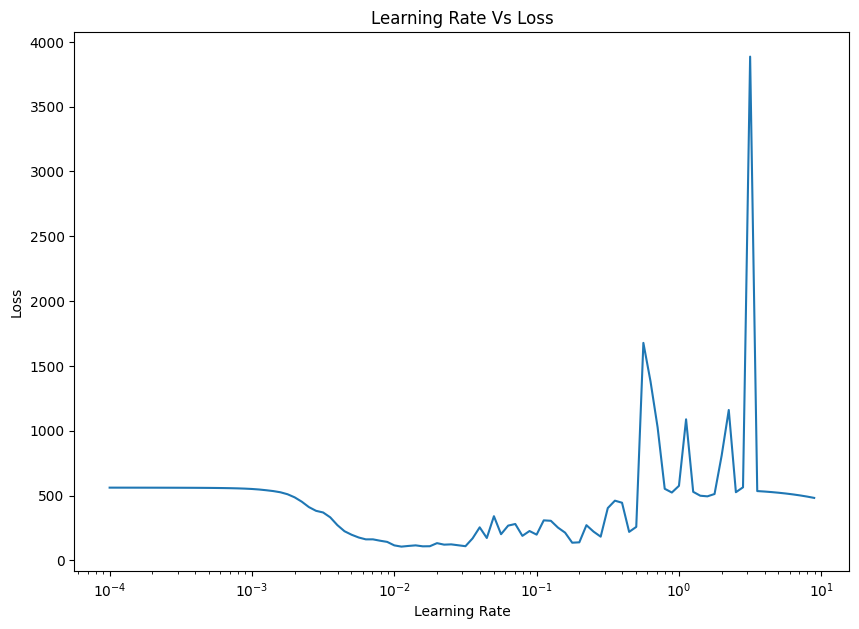

In [ ]:
# Build a model with dropout layers
Model_f = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])



# Compile the model with mean absolute error as the loss function and MAE as a metric
Model_f.compile(optimizer="Adam", loss='mean_absolute_error', metrics=['mae'])
epochs=100
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20) )
history = Model_f.fit(X_train, Y_train, batch_size=128, epochs=epochs,callbacks=[lr_scheduler], validation_data=(X_dev, Y_dev),verbose=0)

lrs=1e-4*(10**(tf.range(epochs)/20))

fig = px.line(x=lrs, y=history.history["loss"], log_x=True, labels={"x": "Learning Rate", "y": "Loss"}, title="Learning Rate Vs Loss")
fig.show()

Using performance Learning Rate schedular

In [ ]:
import tensorflow as tf
import numpy as np

# Define your model architecture
Model_f = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])

# Define the optimizer and the initial learning rate
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Compile the model with mean absolute error as the loss function and MAE as a metric
Model_f.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])

# Define the number of epochs
epochs = 100

# Define the custom callback for learning rate scheduling based on performance
class PerformanceLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, factor=0.5, patience=5, verbose=1, min_delta=1e-4):
        super(PerformanceLearningRateScheduler, self).__init__()
        self.factor = factor
        self.patience = patience
        self.verbose = verbose
        self.min_delta = min_delta
        self.wait = 0
        self.best_val_loss = np.Inf
        self.current_lr = initial_learning_rate

    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_loss')
        if current_val_loss is None:
            return

        if np.less(current_val_loss, self.best_val_loss - self.min_delta):
            self.best_val_loss = current_val_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.current_lr *= self.factor
                if self.verbose > 0:
                    print(f'\nEpoch {epoch+1}: Learning rate reduced to {self.current_lr}.')
                self.wait = 0

        # Set the new learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, self.current_lr)

# Define the callback for performance-based learning rate scheduling
lr_scheduler = PerformanceLearningRateScheduler(factor=0.5, patience=5, verbose=1)

# Train the model
history = Model_f.fit(X_train, Y_train, batch_size=128, epochs=epochs, callbacks=[lr_scheduler],
                      validation_data=(X_dev, Y_dev), verbose=1)


y_dev_pred_S = Model_f.predict(X_dev).flatten()
mae_validation, rmse_validation, r_squared_validation, nmbe_validation = calculate_metrics(Y_dev, y_dev_pred_S)
mae_tf_validation, rmse_tf_validation, r_squared_tf_validation, nmbe_tf_validation = calculate_metrics_tf(Y_dev, y_dev_pred_S)

y_test_pred_S = Model_f.predict(X_test).flatten()
mae_test, rmse_test, r_squared_test, nmbe_test = calculate_metrics(Y_test, y_test_pred_S)
mae_tf_test, rmse_tf_test, r_squared_tf_test, nmbe_tf_test = calculate_metrics_tf(Y_test, y_test_pred_S)

print_metrices()


2/2 [==============================] - 0s 6ms/step

Final Validation MAE: 60.238640754045754 from tf: 60.238640754045754
Final Validation RMSE: 103.39665893298067 from tf: 103.39665893298067
Final Validation R-Squared: 0.9556180811403843 from tf: 0.9556180811403843
Final Validation NMBE: -3.7011372806893066 from tf: -3.7011372806893066

Final Test  MAE: 65.67049782562256 from tf: 65.67049782562256
Final Test  RMSE: 113.84144383195476 from tf: 113.84144383195475
Final Test  R-Squared: 0.9427412181908239 from tf: 0.9427412181908239
Final Test  NMBE: 0.9987906435501506 from tf: 0.9987906435501508



In [ ]:
# Create a DataFrame with the predicted output and actual values
data = pd.DataFrame({'Data Point': range(len(Y_test)),
                     'Estimated Output': y_test_pred_S.flatten(),
                     'Actual Value': Y_test})

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='Data Point', var_name='Variable', value_name='Value')

# Plotting using Plotly Express
fig = px.line(data_melted, x='Data Point', y='Value', color='Variable', line_shape='linear',
              labels={'Value': 'Value', 'Data Point': 'Data Point'},
              title='Estimated Output vs Actual Value on Test Data least test model')
fig.update_layout(xaxis_title='Data Point', yaxis_title='Value')
fig.show()

